## Data Preprocessing

*Prepared by:*
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

This notebook shows how to perform common preprocessing techniques in Python.

## Preliminaries

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
# sns.color_palette('Set2')

### Load data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Cyntwikip/data-repository/main/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preprocessing

### Encoding

In many cases, we need our data to be in numerical format, so how should we deal with datasets with categorical data in it? We can use different encoding strategies for that. One of which is One-hot Encoder. This encoding strategy creates one column for each unique value in the original column. We use this when there is no hierarchy in our categories.

In [13]:
df[['Embarked']]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [18]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df['Embarked'].isnull().sum()

2

#### Pandas get_dummies

One approach for doing one-hot encoding is through Pandas' get_dummies function.

In [15]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


#### Sklearn OneHotEncoder

Another approach for doing one-hot encoding is through sklearn's OneHotEncoder class.

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

df_encoded = encoder.fit_transform(df[['Embarked']]).toarray()
df_encoded = pd.DataFrame(df_encoded, columns=encoder.categories_)
df_encoded

,C,Q,S,NaN
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [26]:
df_encoded.sum(axis=0)

C      168.0
Q       77.0
S      644.0
NaN      2.0
dtype: float64

Notice that there are 4 columns here instead of 3. This is because it also creates a new column (the last one) for the null values.

Additionally, we can transform it back to its original form.

In [27]:
pd.DataFrame(encoder.inverse_transform(df_encoded))

,0
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


### Binning

Binning converts a continuous feature into a categorical one by chunking/binning the values. This is somewhat like the opposite of one-hot encoding.

In [28]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [34]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

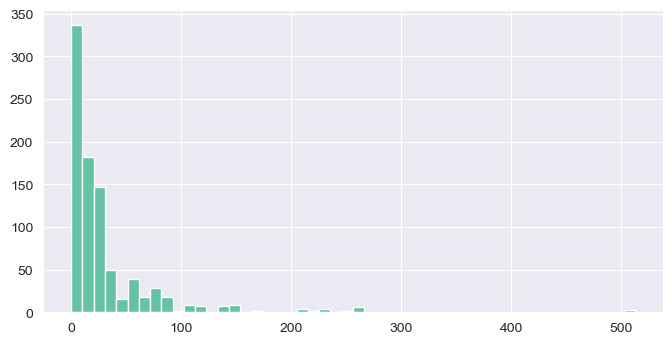

In [32]:
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
df['Fare'].hist(bins=50, ax=ax)
plt.show()

#### Manual cuts

In [54]:
bins = [0, 50, 100, 200, 400]

# Create Group Names
group_names = ['0-49.99','50-99.99','100-199.99','200-399.99']

fare_binned = pd.cut(df['Fare'], bins, labels=group_names, include_lowest=True) # to include the leftmost value in the bins

fare_binned.head()

0     0-49.99
1    50-99.99
2     0-49.99
3    50-99.99
4     0-49.99
Name: Fare, dtype: category
Categories (4, object): ['0-49.99' < '50-99.99' < '100-199.99' < '200-399.99']

In [55]:
fare_binned.value_counts()

0-49.99       731
50-99.99      107
100-199.99     33
200-399.99     17
Name: Fare, dtype: int64

In [56]:
fare_binned[fare_binned.isnull()]

258    NaN
679    NaN
737    NaN
Name: Fare, dtype: category
Categories (4, object): ['0-49.99' < '50-99.99' < '100-199.99' < '200-399.99']

In [57]:
df['Fare'][fare_binned.isnull()]

258    512.3292
679    512.3292
737    512.3292
Name: Fare, dtype: float64

#### Cuts with equal spacing

In [58]:
fare_binned = pd.cut(df['Fare'], 5) 

fare_binned.head()

0    (-0.512, 102.466]
1    (-0.512, 102.466]
2    (-0.512, 102.466]
3    (-0.512, 102.466]
4    (-0.512, 102.466]
Name: Fare, dtype: category
Categories (5, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

### Handling missing data

#### Dropping

If there is not much null values, we can simply drop them.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Although in this example, many rows were omitted.

#### Imputation

Another approach is to impute or fill in missing values instead. We can change the imputation strategy to mean, median, most frequent, and constant. We will use most frequent since it can handle categorical data.

In [68]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


No more missing values now!

In [69]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        891 non-null    object
 11  Embarked     891 non-null    object
dtypes: object(12)
memory usage: 83.7+ KB


### Feature Selection

Sometimes, we don't need some of the features, so we simply drop them.

In [77]:
df_selected = df.drop(['PassengerId', 'Name'], axis=1)
df_selected

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


Here's one-liner code to remove categorical features which I believe will be very useful in many cases.

In [82]:
df_selected = df.loc[:, df.dtypes!='object']
df_selected

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


### Scaling

There are times wherein we will have to rescale our data especially when dealing with Machine Learning.

In [84]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(df_selected)

df_scaled = pd.DataFrame(scaled, columns=df_selected.columns)
df_scaled

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.000000,0.0,1.0,0.271174,0.125,0.000000,0.014151
1,0.001124,1.0,0.0,0.472229,0.125,0.000000,0.139136
2,0.002247,1.0,1.0,0.321438,0.000,0.000000,0.015469
3,0.003371,1.0,0.0,0.434531,0.125,0.000000,0.103644
4,0.004494,0.0,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,0.334004,0.000,0.000000,0.025374
887,0.996629,1.0,0.0,0.233476,0.000,0.000000,0.058556
888,0.997753,0.0,1.0,NaN,0.125,0.333333,0.045771
889,0.998876,1.0,0.0,0.321438,0.000,0.000000,0.058556


Now our minimum and maximum values are 0 and 1.

In [85]:
df_scaled.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.289162,0.486592,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.247612,0.000000,0.000000,0.015440
50%,0.500000,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,0.750000,1.000000,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can also use other scaler techniques such as standard scaler, which standardizes the data by scaling it based on its mean and standard deviation.

In [86]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_selected)

df_scaled = pd.DataFrame(scaled, columns=df_selected.columns)
df_scaled

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,-0.789272,0.827377,-0.530377,0.432793,-0.473674,-0.502445
1,-1.726220,1.266990,-1.566107,0.571831,0.432793,-0.473674,0.786845
2,-1.722332,1.266990,0.827377,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.718444,1.266990,-1.566107,0.365167,0.432793,-0.473674,0.420730
4,-1.714556,-0.789272,0.827377,0.365167,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.185937,-0.474545,-0.473674,-0.386671
887,1.718444,1.266990,-1.566107,-0.737041,-0.474545,-0.473674,-0.044381
888,1.722332,-0.789272,0.827377,NaN,0.432793,2.008933,-0.176263
889,1.726220,1.266990,-1.566107,-0.254825,-0.474545,-0.473674,-0.044381


Now, the data is standardized.

In [87]:
df_scaled.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,7.140000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,6.379733e-17,3.987333e-17,-8.772133e-17,2.388379e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000701e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-7.892723e-01,-1.566107e+00,-2.016979e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,-8.650540e-01,-7.892723e-01,-3.693648e-01,-6.595416e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000e+00,-7.892723e-01,8.273772e-01,-1.170488e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,8.650540e-01,1.266990e+00,8.273772e-01,5.718310e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,1.730108e+00,1.266990e+00,8.273772e-01,3.465126e+00,6.784163e+00,6.974147e+00,9.667167e+00


### Derived features using mathematical operations and functions


In [91]:
df_copy = df.copy()

In [93]:
df_copy['Fare_transformed'] = df['Fare']*2
df_copy[['Fare', 'Fare_transformed']]

,Fare,Fare_transformed
0,7.2500,14.5000
1,71.2833,142.5666
2,7.9250,15.8500
3,53.1000,106.2000
4,8.0500,16.1000
...,...,...
886,13.0000,26.0000
887,30.0000,60.0000
888,23.4500,46.9000
889,30.0000,60.0000


In [92]:
df_copy['Fare_log'] = np.log(df_copy['Fare'])
df_copy[['Fare', 'Fare_log']]

,Fare,Fare_log
0,7.2500,1.981001
1,71.2833,4.266662
2,7.9250,2.070022
3,53.1000,3.972177
4,8.0500,2.085672
...,...,...
886,13.0000,2.564949
887,30.0000,3.401197
888,23.4500,3.154870
889,30.0000,3.401197


## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>